In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
import seaborn as sns

In [2]:
Ev_data = pd.read_csv("env0102.csv", header=5)

In [3]:
Ev_data.columns = Ev_data.columns.str.strip().str.replace(r"\s+", " ", regex=True)
print("Column names:", Ev_data.columns.tolist())

Column names: ['Transport mode and source of energy', '2023 emphasised (Mtoe)', 'Proportion of transport energy consumption 2023 (%)', 'Percentage change 2022 to 2023 (%)', 'Percentage change 2013 to 2023 (%)', 'Percentage change 1998 to 2023 (%)', '1998 (Mtoe)', '1999 (Mtoe)', '2000 (Mtoe)', '2001 (Mtoe)', '2002 (Mtoe)', '2003 (Mtoe)', '2004 (Mtoe)', '2005 (Mtoe)', '2006 (Mtoe)', '2007 (Mtoe)', '2008 (Mtoe)', '2009 (Mtoe)', '2010 (Mtoe)', '2011 (Mtoe)', '2012 (Mtoe)', '2013 (Mtoe)', '2014 (Mtoe)', '2015 (Mtoe)', '2016 (Mtoe)', '2017 (Mtoe)', '2018 (Mtoe)', '2019 (Mtoe)', '2020 (Mtoe)', '2021 (Mtoe)', '2022 (Mtoe)', '2023 (Mtoe)']


In [4]:
label_col = [c for c in Ev_data.columns if "transport" in c.lower()][0]

In [5]:
label_col_candidates = [c for c in Ev_data.columns if "transport" in c.lower()]
print("Possible label columns:", label_col_candidates)

Possible label columns: ['Transport mode and source of energy', 'Proportion of transport energy consumption 2023 (%)']


In [6]:
filtered = Ev_data[Ev_data[label_col].isin(["Road transport, Electricity"])]

In [7]:
years = [f"{y} (Mtoe)" for y in range(2005, 2024)]
years = [y for y in years if y in filtered.columns]

In [8]:
transposed = filtered.set_index(label_col)[years].T
print(transposed)

Transport mode and source of energy Road transport, Electricity
2005 (Mtoe)                                             0.00165
2006 (Mtoe)                                             0.00161
2007 (Mtoe)                                             0.00158
2008 (Mtoe)                                             0.00157
2009 (Mtoe)                                             0.00155
2010 (Mtoe)                                             0.00155
2011 (Mtoe)                                             0.00182
2012 (Mtoe)                                             0.00227
2013 (Mtoe)                                             0.00283
2014 (Mtoe)                                             0.00581
2015 (Mtoe)                                             0.00835
2016 (Mtoe)                                             0.01143
2017 (Mtoe)                                             0.01582
2018 (Mtoe)                                             0.05277
2019 (Mtoe)                             

In [9]:
transposed.index = [int(y[:4]) for y in transposed.index]
transposed.index.name = "Year"
transposed = transposed.reset_index()
print(transposed)

Transport mode and source of energy  Year Road transport, Electricity
0                                    2005                     0.00165
1                                    2006                     0.00161
2                                    2007                     0.00158
3                                    2008                     0.00157
4                                    2009                     0.00155
5                                    2010                     0.00155
6                                    2011                     0.00182
7                                    2012                     0.00227
8                                    2013                     0.00283
9                                    2014                     0.00581
10                                   2015                     0.00835
11                                   2016                     0.01143
12                                   2017                     0.01582
13                  

In [23]:
transposed["Road transport, Electricity"] = pd.to_numeric(
    transposed["Road transport, Electricity"], errors="coerce"
)

transposed["Road transport, Electricity_GWh"] = (
    transposed["Road transport, Electricity"] * 11630
)
print (transposed)

Transport mode and source of energy  Year  Road transport, Electricity  \
0                                    2005                      0.00165   
1                                    2006                      0.00161   
2                                    2007                      0.00158   
3                                    2008                      0.00157   
4                                    2009                      0.00155   
5                                    2010                      0.00155   
6                                    2011                      0.00182   
7                                    2012                      0.00227   
8                                    2013                      0.00283   
9                                    2014                      0.00581   
10                                   2015                      0.00835   
11                                   2016                      0.01143   
12                                   2

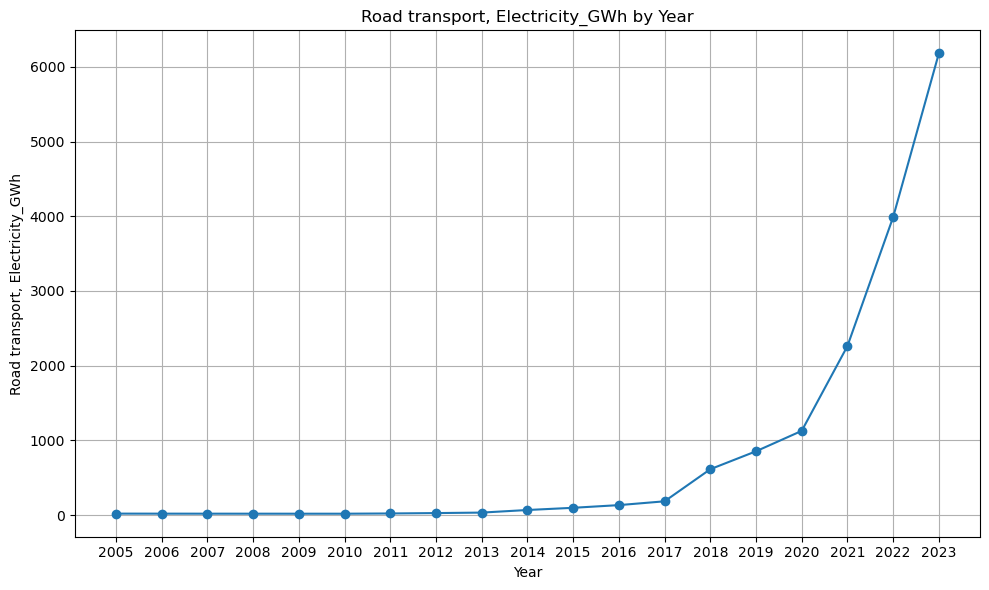

In [31]:
if "Road transport, Electricity_GWh" in transposed.columns:
    transposed["Road transport, Electricity_GWh"] = pd.to_numeric(
        transposed["Road transport, Electricity_GWh"], errors="coerce"
    )

    plt.figure(figsize=(10, 6))
    plt.plot(
        transposed["Year"],
        transposed["Road transport, Electricity_GWh"],
        marker="o",
        linestyle="-"
    )

    plt.title("Road transport, Electricity_GWh by Year")
    plt.xlabel("Year")
    plt.ylabel("Road transport, Electricity_GWh")
    plt.grid(True)

    plt.xticks(transposed["Year"].unique())

    plt.tight_layout()
    plt.show()
else:
    print("Column 'Road transport, Electricity' not found in DataFrame.")

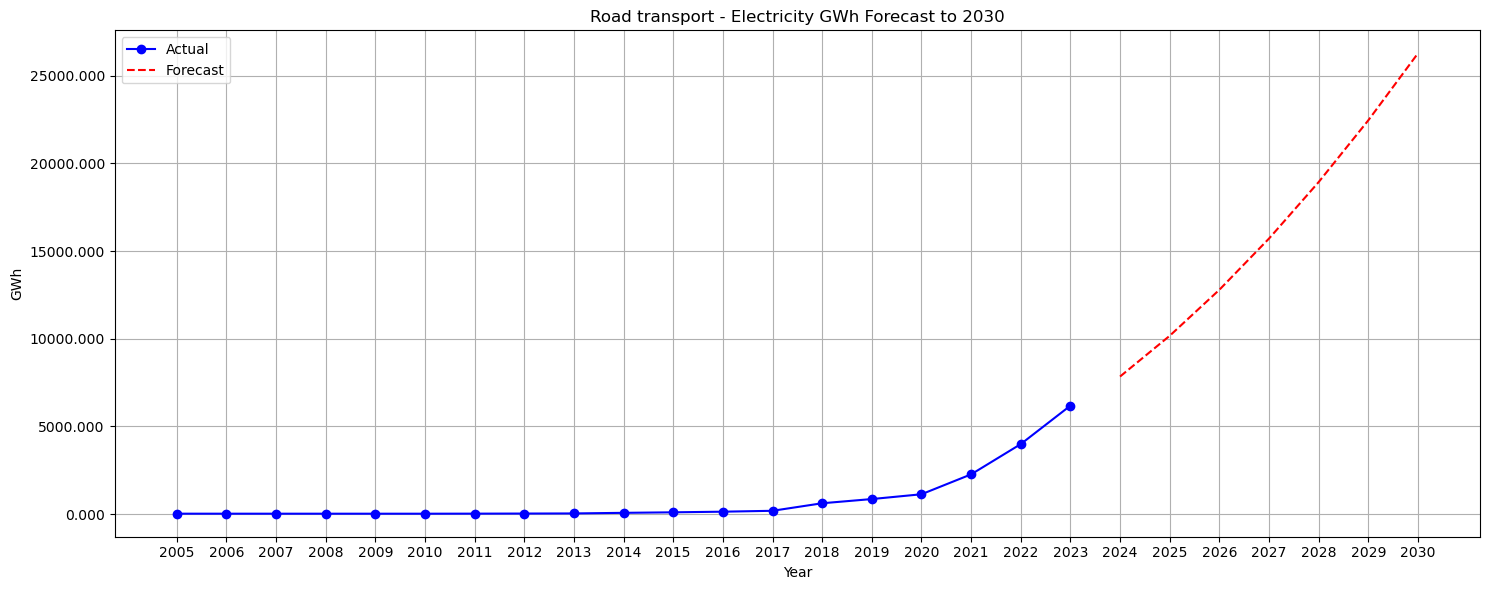

 Year  Road transport, Electricity_GWh_pred
 2024                           7842.588045
 2025                          10166.390528
 2026                          12789.756890
 2027                          15712.687130
 2028                          18935.181249
 2029                          22457.239246
 2030                          26278.861121


In [43]:
y_col = "Road transport, Electricity_GWh"
transposed[y_col] = pd.to_numeric(transposed[y_col], errors="coerce")

fit_data = transposed[transposed["Year"] >= 2015]
X = fit_data["Year"].values.reshape(-1, 1)
y = fit_data[y_col].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

forecast_start_year = 2024
future_years = np.arange(forecast_start_year, 2031)
future_pred = model.predict(poly.transform(future_years.reshape(-1, 1)))

plt.figure(figsize=(15, 6))
plt.plot(
    transposed["Year"], transposed[y_col],
    color="blue", marker="o", label="Actual"
)

plt.plot(
    future_years, future_pred,
    color="red", linestyle="--", label="Forecast"
)

plt.title("Road transport - Electricity GWh Forecast to 2030")
plt.xlabel("Year")
plt.ylabel("GWh")
plt.grid(True)
plt.xticks(np.arange(transposed["Year"].min(), 2031))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.3f}"))
plt.legend()
plt.tight_layout()
plt.show()

pred_df = pd.DataFrame({"Year": future_years, f"{y_col}_pred": future_pred})
print(pred_df.to_string(index=False))

In [41]:
pred_df = pd.DataFrame({"Year": future_years, f"{y_col}_pred": future_pred})
print(pred_df.to_string(index=False))

forecast_df = pd.DataFrame({
    "Year": future_years,
    y_col: future_pred,
    "Type": "Forecast"
})

historical_df = transposed.copy()
historical_df["Type"] = "Historical"

combined_df = pd.concat([historical_df, forecast_df], ignore_index=True)

output_path = "road_transport_electricity_forecast.csv"
combined_df.to_csv(output_path, index=False)

print(f"Combined data saved to: {output_path}")

 Year  Road transport, Electricity_GWh_pred
 2024                           7842.588045
 2025                          10166.390528
 2026                          12789.756890
 2027                          15712.687130
 2028                          18935.181249
 2029                          22457.239246
 2030                          26278.861121
Combined data saved to: road_transport_electricity_forecast.csv
